In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv(r'E:\Datasets\Ipl schedule\ipl_schedule.csv')

In [3]:
data

,DATE,TIME,PM/AM,HOME TEAM,AWAY TEAM,VENUE
0,26/03/22,7:30,PM,Chennai Super Kings,Kolkata Knight Riders,Wankhede Stadium
1,27/03/22,3:30,PM,Delhi Capitals,Mumbai Indians,Brabourne - CCI
2,27/03/22,7:30,PM,Punjab Kings,Royal Challengers Bangalore,DY Patil Stadium
3,28/03/22,7:30,PM,Gujarat Titans,Lucknow Super Giants,Wankhede Stadium
4,29/03/22,7:30,PM,Sunrisers Hyderabad,Rajasthan Royals,"MCA Stadium, Pune"
...,...,...,...,...,...,...
65,18/05/22,7:30,PM,Kolkata Knight Riders,Lucknow Super Giants,DY Patil Stadium
66,19/05/22,7:30,PM,Royal Challengers Bangalore,Gujarat Titans,Wankhede Stadium
67,20/05/22,7:30,PM,Rajasthan Royals,Chennai Super Kings,Brabourne - CCI
68,21/05/22,7:30,PM,Mumbai Indians,Delhi Capitals,Wankhede Stadium


In [4]:
data.describe()

,DATE,TIME,PM/AM,HOME TEAM,AWAY TEAM,VENUE
count,70,70,70,70,70,70
unique,58,2,1,10,10,4
top,17/04/22,7:30,PM,Lucknow Super Giants,Lucknow Super Giants,DY Patil Stadium
freq,2,58,70,7,7,20


In [5]:
data.sample(5)

,DATE,TIME,PM/AM,HOME TEAM,AWAY TEAM,VENUE
42,30/04/22,3:30,PM,Gujarat Titans,Royal Challengers Bangalore,Brabourne - CCI
57,05/11/22,7:30,PM,Rajasthan Royals,Delhi Capitals,DY Patil Stadium
3,28/03/22,7:30,PM,Gujarat Titans,Lucknow Super Giants,Wankhede Stadium
36,24/04/22,7:30,PM,Lucknow Super Giants,Mumbai Indians,Wankhede Stadium
15,04/08/22,7:30,PM,Punjab Kings,Gujarat Titans,Brabourne - CCI


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70 non-null     object
 1   TIME       70 non-null     object
 2   PM/AM      70 non-null     object
 3   HOME TEAM  70 non-null     object
 4   AWAY TEAM  70 non-null     object
 5   VENUE      70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [7]:
data['DATE']=pd.to_datetime(data['DATE'])

In [8]:
data.tail()

,DATE,TIME,PM/AM,HOME TEAM,AWAY TEAM,VENUE
65,2022-05-18,7:30,PM,Kolkata Knight Riders,Lucknow Super Giants,DY Patil Stadium
66,2022-05-19,7:30,PM,Royal Challengers Bangalore,Gujarat Titans,Wankhede Stadium
67,2022-05-20,7:30,PM,Rajasthan Royals,Chennai Super Kings,Brabourne - CCI
68,2022-05-21,7:30,PM,Mumbai Indians,Delhi Capitals,Wankhede Stadium
69,2022-05-22,7:30,PM,Sunrisers Hyderabad,Punjab Kings,Wankhede Stadium


## Total 70 matches before qualifier round out of which 58 days have match at 7:30 and 12 days have match at 3:30

In [9]:
data['TIME'].value_counts()

# data.TIME.value_counts()  ## same

7:30    58
3:30    12
Name: TIME, dtype: int64

In [10]:
data.TIME.value_counts(normalize=True)  # near equal to 83%

7:30    0.828571
3:30    0.171429
Name: TIME, dtype: float64

In [11]:
freq=pd.DataFrame(data.TIME.value_counts(normalize=True)*100)

freq

,TIME
7:30,82.857143
3:30,17.142857


In [12]:
freq.reset_index(inplace=True)

freq

,index,TIME
0,7:30,82.857143
1,3:30,17.142857


In [13]:
freq.columns=['match time', 'freq in %']

freq

,match time,freq in %
0,7:30,82.857143
1,3:30,17.142857


## 83% matches will start at 7:30

<AxesSubplot:title={'center':'2022 Match timing'}, xlabel='match time'>

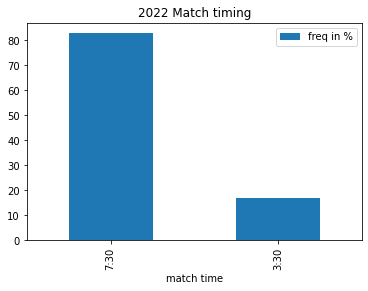

In [14]:
freq.plot.bar("match time",'freq in %',title='2022 Match timing')   # 58 matches from 7:30 and 

## There is 46 days having 1 match and 12 days having 2 matches

In [15]:
match_date=pd.DataFrame(data['DATE'].value_counts()).reset_index()

In [16]:
match_date.sample(5)

,index,DATE
39,2022-04-19,1
52,2022-04-04,1
42,2022-03-26,1
33,2022-03-30,1
37,2022-03-31,1


In [17]:
match_date.DATE.value_counts() # there is 46 days having one match and 12 days having 2 matches

1    46
2    12
Name: DATE, dtype: int64

## Each team will play 7 matches in their home ground

In [18]:
home_team_match_count=pd.DataFrame(data['HOME TEAM'].value_counts()).reset_index()
home_team_match_count.rename(columns={'index':'Team Name','HOME TEAM':'Number of Matches in Home'},inplace=True)
home_team_match_count # each team will play 7 matches in their home ground

,Team Name,Number of Matches in Home
0,Lucknow Super Giants,7
1,Chennai Super Kings,7
2,Sunrisers Hyderabad,7
3,Punjab Kings,7
4,Gujarat Titans,7
5,Rajasthan Royals,7
6,Mumbai Indians,7
7,Royal Challengers Bangalore,7
8,Kolkata Knight Riders,7
9,Delhi Capitals,7


## Each team will play 7 matches in away ground

In [19]:
away_team=pd.DataFrame(data['AWAY TEAM'].value_counts()).reset_index()
away_team.columns=['Team Name','Number of Matches in away']
away_team # each team will play 7 matches in away ground

,Team Name,Number of Matches in away
0,Lucknow Super Giants,7
1,Chennai Super Kings,7
2,Sunrisers Hyderabad,7
3,Punjab Kings,7
4,Gujarat Titans,7
5,Kolkata Knight Riders,7
6,Rajasthan Royals,7
7,Royal Challengers Bangalore,7
8,Mumbai Indians,7
9,Delhi Capitals,7


## There are only 4 stadiums

In [20]:
venue=pd.DataFrame(data['VENUE'].value_counts()).reset_index()
venue.columns=['Venue','Number of Matches']
venue

,Venue,Number of Matches
0,DY Patil Stadium,20
1,Wankhede Stadium,20
2,Brabourne - CCI,15
3,"MCA Stadium, Pune",15


## Number of matches in each stadium

<AxesSubplot:title={'center':'Number of Matches in Stadium'}, xlabel='Venue'>

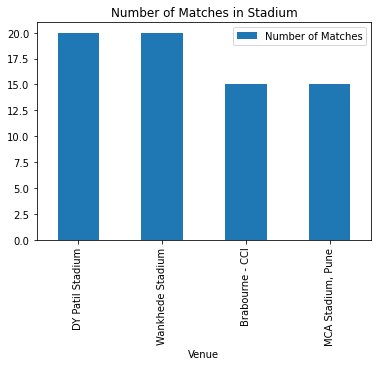

In [21]:
venue.plot.bar('Venue','Number of Matches', title='Number of Matches in Stadium')

## RCB's Home ground is not fixed

In [22]:
data.loc[data['HOME TEAM']=='Royal Challengers Bangalore']

,DATE,TIME,PM/AM,HOME TEAM,AWAY TEAM,VENUE
5,2022-03-30,7:30,PM,Royal Challengers Bangalore,Kolkata Knight Riders,DY Patil Stadium
17,2022-04-09,7:30,PM,Royal Challengers Bangalore,Mumbai Indians,"MCA Stadium, Pune"
35,2022-04-23,7:30,PM,Royal Challengers Bangalore,Sunrisers Hyderabad,Brabourne - CCI
38,2022-04-26,7:30,PM,Royal Challengers Bangalore,Rajasthan Royals,"MCA Stadium, Pune"
48,2022-05-04,7:30,PM,Royal Challengers Bangalore,Chennai Super Kings,"MCA Stadium, Pune"
59,2022-05-13,7:30,PM,Royal Challengers Bangalore,Punjab Kings,Brabourne - CCI
66,2022-05-19,7:30,PM,Royal Challengers Bangalore,Gujarat Titans,Wankhede Stadium


In [23]:
Home_ground_rcb=pd.DataFrame((data.loc[data['HOME TEAM']=='Royal Challengers Bangalore'])['VENUE'].value_counts()).reset_index()
Home_ground_rcb.columns=['Venue for Home Match','Number of Matches']

In [24]:
Home_ground_rcb

,Venue for Home Match,Number of Matches
0,"MCA Stadium, Pune",3
1,Brabourne - CCI,2
2,DY Patil Stadium,1
3,Wankhede Stadium,1


## All Home Grounds and Number of Matches

In [25]:
for team in away_team['Team Name']:
    Home_ground=pd.DataFrame((data.loc[data['HOME TEAM']==team])['VENUE'].value_counts()).reset_index()
    Home_ground.columns=['Venue for Home Match','Number of Matches']
    print('\n\nHome Grounds for',team,'is:\n\n')
    print(Home_ground)
    print('-'*40)



Home Grounds for Lucknow Super Giants is:


  Venue for Home Match  Number of Matches
0      Brabourne - CCI                  2
1     DY Patil Stadium                  2
2    MCA Stadium, Pune                  2
3     Wankhede Stadium                  1
----------------------------------------


Home Grounds for Chennai Super Kings is:


  Venue for Home Match  Number of Matches
0     Wankhede Stadium                  3
1     DY Patil Stadium                  3
2      Brabourne - CCI                  1
----------------------------------------


Home Grounds for Sunrisers Hyderabad is:


  Venue for Home Match  Number of Matches
0     DY Patil Stadium                  2
1    MCA Stadium, Pune                  2
2     Wankhede Stadium                  2
3      Brabourne - CCI                  1
----------------------------------------


Home Grounds for Punjab Kings is:


  Venue for Home Match  Number of Matches
0     DY Patil Stadium                  3
1     Wankhede Stadium         

## All Away Grounds and Number of Matches

In [27]:
for team in away_team['Team Name']:
    Away_ground=pd.DataFrame((data.loc[data['AWAY TEAM']==team])['VENUE'].value_counts()).reset_index()
    Away_ground.columns=['Venue for Away Match','Number of Matches']
    print('\n\nAway Grounds for',team,'is:\n\n')
    print(Away_ground)
    print('-'*40)



Away Grounds for Lucknow Super Giants is:


  Venue for Away Match  Number of Matches
0     Wankhede Stadium                  3
1     DY Patil Stadium                  2
2      Brabourne - CCI                  1
3    MCA Stadium, Pune                  1
----------------------------------------


Away Grounds for Chennai Super Kings is:


  Venue for Away Match  Number of Matches
0    MCA Stadium, Pune                  3
1      Brabourne - CCI                  2
2     DY Patil Stadium                  1
3     Wankhede Stadium                  1
----------------------------------------


Away Grounds for Sunrisers Hyderabad is:


  Venue for Away Match  Number of Matches
0      Brabourne - CCI                  2
1     DY Patil Stadium                  2
2     Wankhede Stadium                  2
3    MCA Stadium, Pune                  1
----------------------------------------


Away Grounds for Punjab Kings is:


  Venue for Away Match  Number of Matches
0      Brabourne - CCI         